# 환경설정

In [9]:
import pandas as pd
from IPython.display import display, HTML

* 여러개의 데이터프레임을 가로방향으로 출력하기 위한 설정

In [2]:
HTML('<style>.output {flex-direction: row;}</style>')

* 병합을 위한 두 개의 데이터프레임 생성

In [3]:
# 첫 번째 데이터프레임 생성
df1 = pd.DataFrame({
    '상품명': ['마우스', '키보드', '모니터'],
    '가격': [15000, 30000, 200000],
    '재고량': [50, 30, 10]
})

# 두 번째 데이터프레임 생성
df2 = pd.DataFrame({
    '상품명': ['이어폰', '헤드폰', '스피커'],
    '가격': [25000, 50000, 100000],
    '재고량': [20, 15, 5]
})

In [4]:
df1

,상품명,가격,재고량
0,마우스,15000,50
1,키보드,30000,30
2,모니터,200000,10


In [5]:
df2

,상품명,가격,재고량
0,이어폰,25000,20
1,헤드폰,50000,15
2,스피커,100000,5


In [7]:
def display_wide(df1, df2):
    display(HTML(
    f"""
    <div style="display: flex;">
        <div style="margin-right: 20px;">
            {df1.to_html()}
        </div>
        <div>
            {df2.to_html()}
        </div>
    </div>
    """
))

In [8]:
display_wide(df1,df2)

,상품명,가격,재고량
0,마우스,15000,50
1,키보드,30000,30
2,모니터,200000,10
,상품명,가격,재고량
0,이어폰,25000,20
1,헤드폰,50000,15
2,스피커,100000,5


* 병합할 신규 데이터프레임 생성

In [10]:
pd.concat([df1, df2]) # 기본값은 행단위로 병합

,상품명,가격,재고량
0,마우스,15000,50
1,키보드,30000,30
2,모니터,200000,10
0,이어폰,25000,20
1,헤드폰,50000,15
2,스피커,100000,5


In [11]:
pd.concat([df1, df2], ignore_index=True) # 기준 데이터프레임의 마지막 인덱스에 이어서 병합할 데이터 프레임의 인덱스 지정

,상품명,가격,재고량
0,마우스,15000,50
1,키보드,30000,30
2,모니터,200000,10
3,이어폰,25000,20
4,헤드폰,50000,15
5,스피커,100000,5


* 기준 데이터 프레임 확장

In [12]:
df_merged = pd.concat([df1, df2], ignore_index=True)
df_merged

,상품명,가격,재고량
0,마우스,15000,50
1,키보드,30000,30
2,모니터,200000,10
3,이어폰,25000,20
4,헤드폰,50000,15
5,스피커,100000,5


## 열 단위 병합
* 두개의 데이터 프레임의 열이 서로 다르지만 행단위로 서로 같은 성격의 연관관계가 있는 경우

In [13]:
df1 = pd.DataFrame({
    '이름': ['홍길동', '김철수', '이영희'],
    '나이': [20, 25, 30]
})

# 두 번째 데이터프레임 생성
df2 = pd.DataFrame({
    '성별': ['남성', '남성', '여성'],
    '직업': ['학생', '회사원', '데이터 전문가']
})

In [14]:
display_wide( df1, df2 )

,이름,나이
0,홍길동,20
1,김철수,25
2,이영희,30
,성별,직업
0,남성,학생
1,남성,회사원
2,여성,데이터 전문가


In [17]:
result = pd.concat([df1, df2], axis=1) # 열단위 병합일 경우 ignore_index 설정이 의미가 없다
result

,이름,나이,성별,직업
0,홍길동,20,남성,학생
1,김철수,25,남성,회사원
2,이영희,30,여성,데이터 전문가


### 열 병합후 순서 조정

In [20]:
result = result[['이름','성별','나이','직업']]

In [21]:
result

,이름,성별,나이,직업
0,홍길동,남성,20,학생
1,김철수,남성,25,회사원
2,이영희,여성,30,데이터 전문가


# 복잡한 병합
* 주로 merge() 함수를 사용

In [22]:
# df1 데이터프레임 생성
df1 = pd.DataFrame({
    'employee_id': [1, 2, 3, 4, 5, 6],
    'employee_name': ['홍길동', '김철수', '이영희', '박민지', '최영호', '나사장'],
    'department_id': [101, 102, 101, 102, 103, 201]
})

# 테이블 B 데이터프레임 생성
df2 = pd.DataFrame({
    'department_id': [101, 102, 103, 104],
    'department_name': ['개발', '영업', '마케팅', '재무']
})

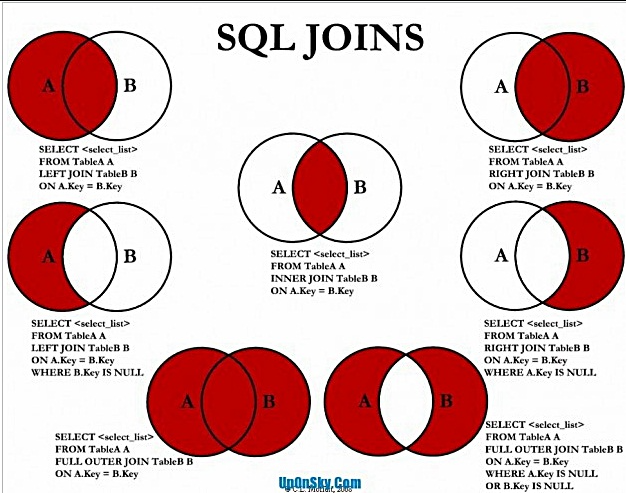

In [23]:
display_wide(df1, df2)

## Inner Join 

* pd.merge(첫번째(왼쪽)데이터프레임, 두번째(오른쪽)데이터프레임, on=조인키)  
 조인키: 양쪽 데이터 프레임에 있는 열이름

In [24]:
pd.merge(df1, df2, on='department_id')

,employee_id,employee_name,department_id,department_name
0,1,홍길동,101,개발
1,2,김철수,102,영업
2,3,이영희,101,개발
3,4,박민지,102,영업
4,5,최영호,103,마케팅


* on 옵션 생략  
 조인할 키가 동일한 이름으로 양쪽 데이터 프레임에 있는 경우 on 인자 생략 가능

In [25]:
pd.merge(df1, df2)

,employee_id,employee_name,department_id,department_name
0,1,홍길동,101,개발
1,2,김철수,102,영업
2,3,이영희,101,개발
3,4,박민지,102,영업
4,5,최영호,103,마케팅


* 조인키의 이름이 같지 않을 경우 (의미 상으로는 같은 열이어야함)  
left_on, right_on으로 각각 조인키 지정

In [26]:
# df1 데이터프레임 생성
df_temp1 = pd.DataFrame({
    'employee_id': [1, 2, 3, 4, 5, 6],
    'employee_name': ['홍길동', '김철수', '이영희', '박민지', '최영호', '나사장'],
    'department_id': [101, 102, 101, 102, 103, 201]
})

# 테이블 B 데이터프레임 생성
df_temp2 = pd.DataFrame({
    'depart_id': [101, 102, 103, 104],
    'department_name': ['개발', '영업', '마케팅', '재무']
})

In [27]:
display_wide(df_temp1, df_temp2)

In [31]:
result = pd.merge(df_temp1, df_temp2, left_on='department_id', right_on='depart_id')

In [34]:
result.drop(columns=['depart_id'], inplace=True)

In [35]:
result

,employee_id,employee_name,department_id,department_name
0,1,홍길동,101,개발
1,2,김철수,102,영업
2,3,이영희,101,개발
3,4,박민지,102,영업
4,5,최영호,103,마케팅


## Left 조인

* 조인의 기준을 Left로 둘 경우 Left 조인키의 병합 결과를 모두 보여줌으로써  
  Left를 기준으로 병합이 되지 않은 이력(NaN)을 확인하여 추후 병합을 준비할 수 있다.

In [36]:
display_wide(df1, df2)

In [37]:
pd.merge(df1, df2, how='left')

,employee_id,employee_name,department_id,department_name
0,1,홍길동,101,개발
1,2,김철수,102,영업
2,3,이영희,101,개발
3,4,박민지,102,영업
4,5,최영호,103,마케팅
5,6,나사장,201,NaN


## Right 조인

In [38]:
pd.merge(df1, df2, how='right')

,employee_id,employee_name,department_id,department_name
0,1.0,홍길동,101,개발
1,3.0,이영희,101,개발
2,2.0,김철수,102,영업
3,4.0,박민지,102,영업
4,5.0,최영호,103,마케팅
5,NaN,NaN,104,재무


## Outer 조인

* 병합을 시도했으나 병합이 되지 않은 모든 정보에 대해 확인 가능하다.

In [39]:
pd.merge(df1, df2, how='outer')

,employee_id,employee_name,department_id,department_name
0,1.0,홍길동,101,개발
1,3.0,이영희,101,개발
2,2.0,김철수,102,영업
3,4.0,박민지,102,영업
4,5.0,최영호,103,마케팅
5,NaN,NaN,104,재무
6,6.0,나사장,201,NaN


## df1-df2 차집합

* indicator=True를 주면 판다스가 자동으로 _merge라는 컬럼이 추가

* _merge 값 종류
    * _merge 컬럼에는 3가지 값이 들어갑니다:
    * "left_only" : 왼쪽 테이블(df_temp1)에만 존재하는 행
    * "right_only" : 오른쪽 테이블(df_temp2)에만 존재하는 행
    * "both" : 양쪽 테이블 모두 존재하는 행 (즉, 조인 조건이 매칭된 경우)

In [40]:
df_diff = pd.merge(df1, df2, how='left', indicator=True)
df_diff

,employee_id,employee_name,department_id,department_name,_merge
0,1,홍길동,101,개발,both
1,2,김철수,102,영업,both
2,3,이영희,101,개발,both
3,4,박민지,102,영업,both
4,5,최영호,103,마케팅,both
5,6,나사장,201,NaN,left_only


In [43]:
df_diff[ df_diff['_merge'] == 'left_only'] 

,employee_id,employee_name,department_id,department_name,_merge
5,6,나사장,201,NaN,left_only


In [44]:
df_diff[ df_diff['_merge'] == 'left_only'] [['employee_id','employee_name','department_id','department_name']]

,employee_id,employee_name,department_id,department_name
5,6,나사장,201,NaN


## df2-df1 차집합

In [45]:
df_diff = pd.merge(df2, df1, how='left', indicator=True)
df_diff

,department_id,department_name,employee_id,employee_name,_merge
0,101,개발,1.0,홍길동,both
1,101,개발,3.0,이영희,both
2,102,영업,2.0,김철수,both
3,102,영업,4.0,박민지,both
4,103,마케팅,5.0,최영호,both
5,104,재무,NaN,NaN,left_only


In [46]:
df_diff[ df_diff['_merge'] == 'left_only'] [['employee_id','employee_name','department_id','department_name']]

,employee_id,employee_name,department_id,department_name
5,NaN,NaN,104,재무


## Outer조인 - Inner조인 

In [47]:
df_outer_minus_inner = pd.merge(df2, df1, how='outer', indicator=True)
df_outer_minus_inner

,department_id,department_name,employee_id,employee_name,_merge
0,101,개발,1.0,홍길동,both
1,101,개발,3.0,이영희,both
2,102,영업,2.0,김철수,both
3,102,영업,4.0,박민지,both
4,103,마케팅,5.0,최영호,both
5,104,재무,NaN,NaN,left_only
6,201,NaN,6.0,나사장,right_only


In [52]:
df_outer_minus_inner.columns

Index(['department_id', 'department_name', 'employee_id', 'employee_name',
       '_merge'],
      dtype='object')

In [54]:
df_outer_minus_inner [ df_outer_minus_inner['_merge'] != 'both' ][ ['department_id', 'department_name', 'employee_id', 'employee_name' ] ]

,department_id,department_name,employee_id,employee_name
5,104,재무,NaN,NaN
6,201,NaN,6.0,나사장
